<br/>

## 1.1 What is Regularization

Getting a good training accuracy along with a poor test accuracy, this type of model can predict the training set very well, but it can't perform well for the test as well as new dataset. This type of situation or model is called **Overfitting**. So how can we solved this problem?
<br/>

Here comes up **Regularizaton** to solve this problem. So in short, we can say that Regularizaton is the process to prevent a model to be overfitted.
<br/>

But how? Regularization can be carried out by **Ridge Regression** and **Lasso Regression** . We will try to learn how these regression work and reduce the risk of overfitting.

## 1.2 Ridge Regression

It's also called L2 regularization. It shrinks the coefficients by adding a penalty to the least squares.
<br/>

**Ridge Regression penalty =  lambda  x  (square of the magnitude of the coefficients)**
<br/>

By shrinking the coefficients Ridge Regession reduces the model complexity and multi-collinearity. But it keeps all the variables.

<br/>

## 1.3 Lasso Regression

It's also called L1 regularization. It shrinks the coefficients by adding a penalty to magnitude of the coefficients.
<br/>

**Lasso Regression penalty =  lambda  x  |the magnitude of the coefficients|**
<br/>

By shrinking the coefficients Lasso Regession also reduces the model complexity and multi-collinearity like Ridge Regression. But in Lasso Regression, the coefficients of less important variables get multiplied by zero and removed.

<br/>

## 1.5 Key differences

Ridge and Lasso Regression are almost same. But the only key difference they have is Ridge Regression doesn't remove any features while the features with less importance is removed by Lasso Regression.

<br/>

## 1.6 Criteria to choose regularization method
<br/>

**Ridge Regression**
1. When all the features you have are important to your model  
2. When you don't want to do feature selection as well as feature removing  
<br/>

**Lasso Regression**
1. When you have too many features    
2. When you want to remove the features with less importance  
<br/>

## Conceptual Overview


Lasso and Ridge regression, also known as L1 & L2 respectively, are **“regularization”** techniques.

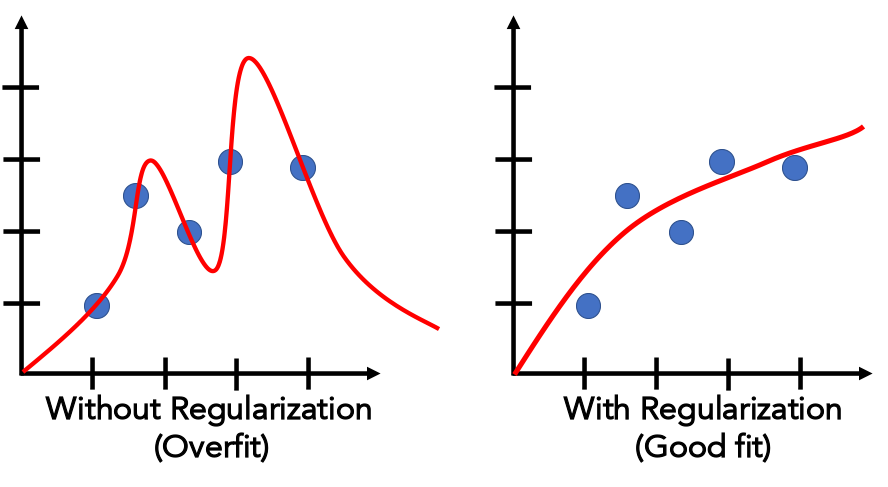

The goal of regularization is to improve the overall fit by increasing **“bias”** to reduce **“variance”**, by adding a penalty that scales with model complexity.

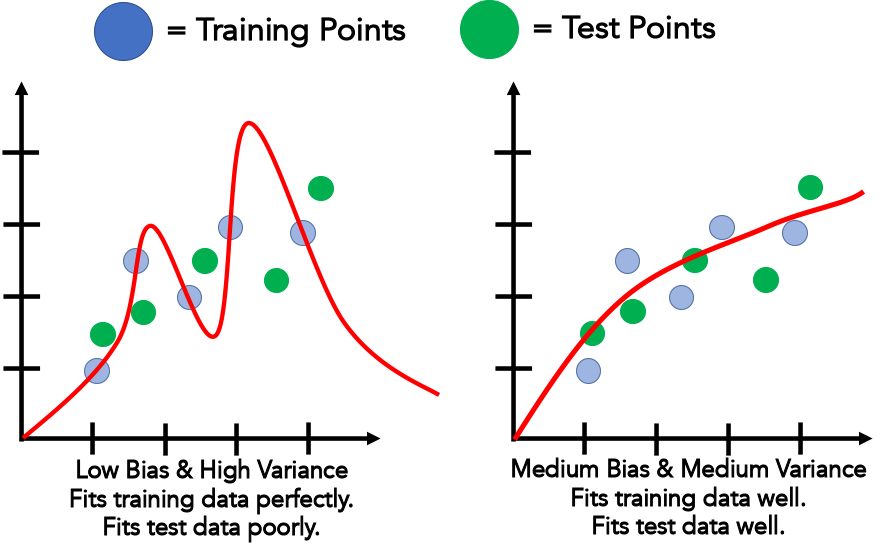

Applying this to linear regression, we start with a line through our data.

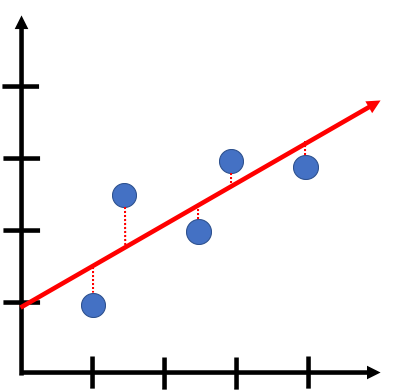

We calculate the residuals as usual.

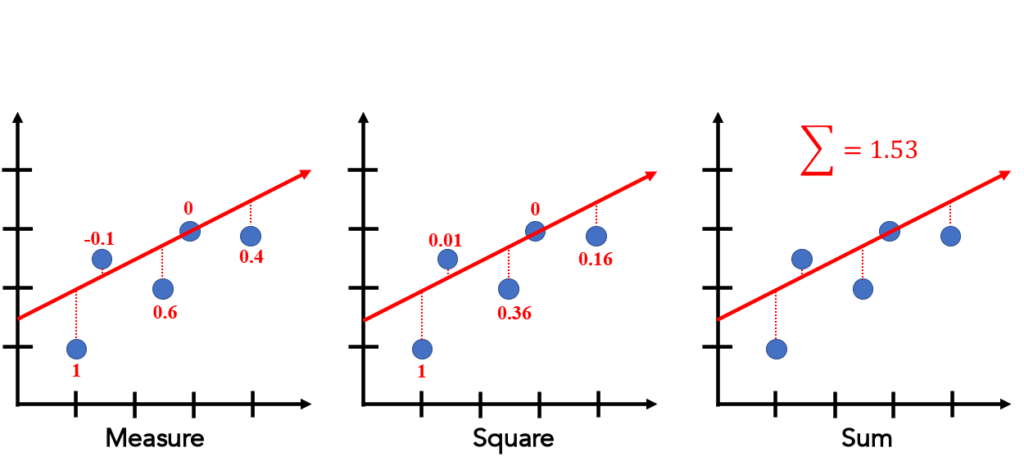

Next, the penalty is calculated.  For Lasso, the penalty scales with the absolute value of the slope, and for Ridge it scales with the slope squared.

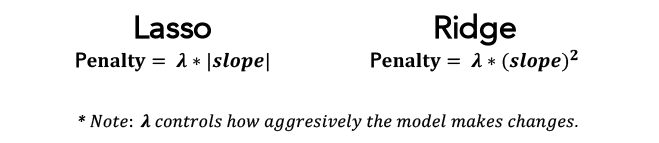

The penalty is added to our residual, and then the algorithm proceeds via the least-squares method.

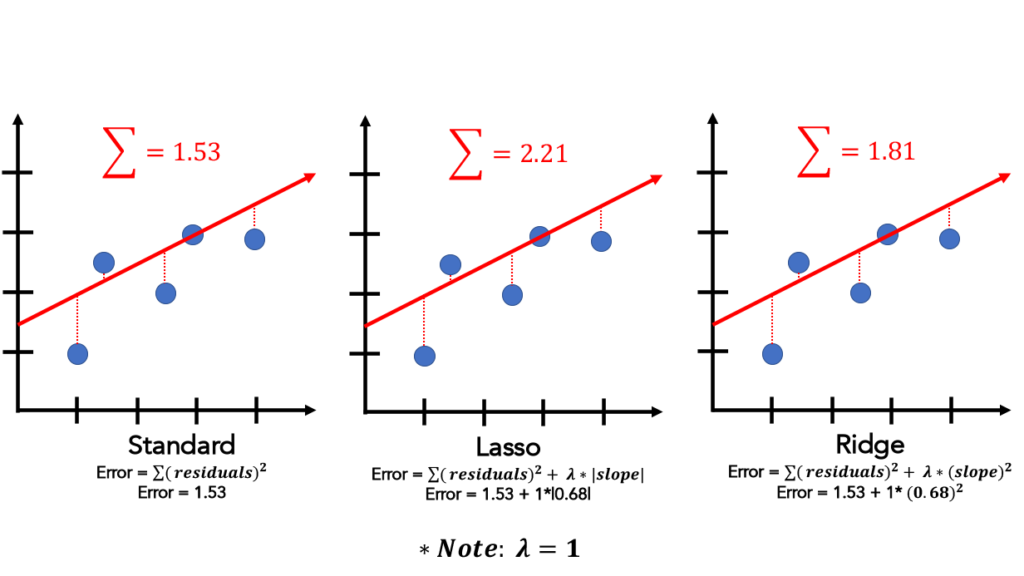

The result is a best-fit line with a smaller slope, that will hopefully fit our test data better.

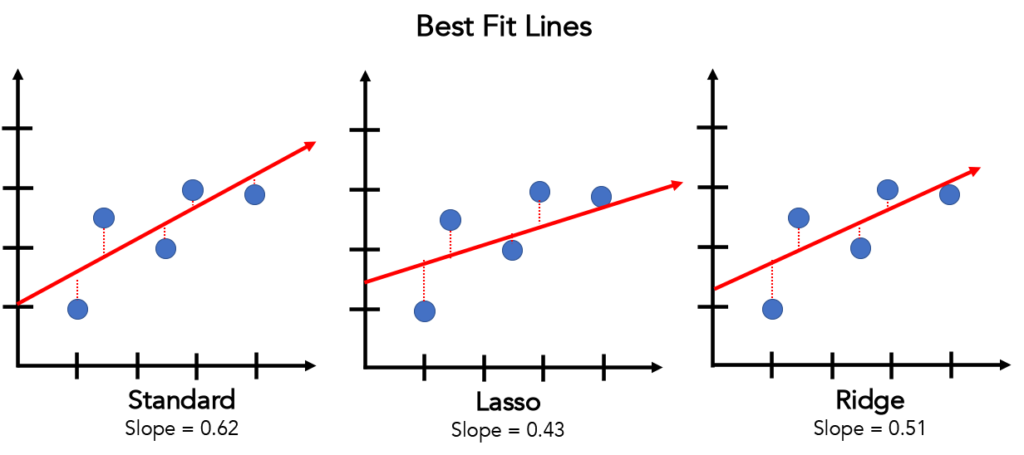

## Implementation

In [ ]:
#Numpy is used so that we can deal with array's, which are necessary for any linear algebra
# that takes place "under-the-hood" for any of these algorithms.

import numpy as np


#Pandas is used so that we can create dataframes, which is particularly useful when
# reading or writing from a CSV.

import pandas as pd


#Matplotlib is used to generate graphs in just a few lines of code.

import matplotlib.pyplot as plt


#Import the classes we need to test linear, ridge, and lasso to compare

from sklearn.linear_model import LinearRegression, Ridge, Lasso


#These will be our main evaluation metrics 
from sklearn.metrics import r2_score, mean_squared_error



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Will use this to "normalize" our data.
from sklearn.preprocessing import normalize



Next we will need to load our data.

I will use data on 50 start ups as I have for decision trees and random forests. 

In [ ]:
#read the data from csv
dataset = pd.read_csv('Startups_data.csv')

#take a look at our dataset.  head() gives the first 5 lines. 
dataset.head()

Now to keep this simple, I am only going to look at the continous variables, so we need to drop the State Column.

In [ ]:
#drop the column
dataset = dataset.drop(columns = ['State'])

#take a look again 
dataset.head()

Ok it's looking good.  Now we need to select the X variables and the Y variable (Independent and Dependent)

In [ ]:
#set independent variable by using all rows, but just column 1.
X = dataset.iloc[:, :-1].values

#set the dependent variable using all rows but only the last column. 
y = dataset.iloc[:, -1].values

#lets take a look at X right now.
X[0:10]

Next we need to scale down our X variables in order for our "alphas" to have an impact later when we introduce LASSO and RIDGE.

We have two options, standardize and normalize.  Since we don't know the distrobution of our data, we will use normalize.

In [ ]:
X = normalize(X, 'l2')

X[0:10]

In order to understand the effectiveness of Lasso and Ridge regression we will need a test set, so lets split our data into training and test sets.

In [ ]:
#split the dataset.  Take 40% to be our test set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)


With the dataset split, we can now load and fit the models.

I will start with basic Linear Regression first.

In [ ]:
#this sets the object regressor to the class of LinearRegression from the Sklearn library.
regressor = LinearRegression()

#this fits the model to our training data.
regressor.fit(X_train, y_train)

Now we can use the model to predict fit on the test set. 

In [ ]:
#Predict on our test set.
y_pred = regressor.predict(X_test)

Finally, we can evaluate the quality of the fit. 

In [ ]:
#calculate the R^2 score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

#print out our score properly formatted as a percent.
print("R^2 score:", "{:.4f}%".format(score))
print("MSE", round(mse,2))

We get an R^2 score of 83%, which is pretty good, but the mean squared error looks super high. 

So let's move on and look at Lasso Regression and see if we can bring down the error. 

With Lasso regression, we have a new metric, 'alpha'

To keep this simple, will just use  "for-loop" to test for multiple alphas and show the accuracy. 

So will define a function to do all of this, and then pass in the alphas. 

In [ ]:
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train, y_train) 
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha(alpha)

Here we see that Lasso only slightly improved the accuracy of the model in the base case scenario.  Specifically where the Alpha was a large negative value.  This means that the true distrubtion actually has a higher slope than our inital model predicted. 

Now lets move on to ridge.

In [ ]:
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha_ridge(a):
    model_lasso = Ridge(alpha=a)
    model_lasso.fit(X_train, y_train) 
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha_ridge(alpha)

Here we see that Ridge is much more sensitive to the scale of Alpha, so lets fine tune it using only positive values. 

In [ ]:
new_alphas = [1e-15,1e-10,1e-8,1e-4, 1e-3, 1e-2, 1]

for alpha in new_alphas:
    test_alpha_ridge(alpha)

Here we see that Lasso and Ridge Regression in this case **DO NOT** significantly improve the overall fit of the model. 

This is to be expected in some situations, but it is always great to check and verify when trying to fine tune your regression model. 